# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Reading the csv file and assining a variable

In [3]:
data = pd.read_csv(r'C:\Users\user\OneDrive\Documents\10 Acadamy\rating.csv', encoding='utf-8')
data_traffic = pd.read_csv(r'C:\Users\user\OneDrive\Documents\10 Acadamy\traffic.csv', encoding='utf-8')
data_domain = pd.read_csv(r'C:\Users\user\OneDrive\Documents\10 Acadamy\domains_location.csv', encoding='utf-8')

# Checking the csv data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58356 entries, 0 to 58355
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       58356 non-null  int64 
 1   source_id        17771 non-null  object
 2   source_name      58356 non-null  object
 3   author           56193 non-null  object
 4   title            58356 non-null  object
 5   description      58346 non-null  object
 6   url              58356 non-null  object
 7   url_to_image     54905 non-null  object
 8   published_at     58356 non-null  object
 9   content          58356 non-null  object
 10  category         58335 non-null  object
 11  article          58356 non-null  object
 12  title_sentiment  58356 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.8+ MB


In [ ]:
data.isnull().sum()

In [4]:
data.head() # to view the top datas

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral


In [ ]:
data.tail() # to view the bottom datas

In [ ]:
data_traffic.head()

In [ ]:
data_traffic.tail()

In [ ]:
data_domain.head()

# Task 1- Websites that have the largest count of news articles

In [5]:
from urllib.parse import urlparse
def extract_website(url):
    parsed_url = urlparse(url)
    return parsed_url.netloc
data['website'] = data['url'].apply(extract_website)
website_counts = data['website'].value_counts()
sorted_website_data = website_counts.sort_values(ascending=False)
top_websites = sorted_website_data.head(10)
bottom_websites = sorted_website_data.tail(10)
print("Top Ten website by number of article published:")
print(top_websites)
print("\nBottom Ten websites by number of article published:")
print(bottom_websites)

Top Ten website by number of article published:
website
www.etfdailynews.com            16746
www.globenewswire.com            5423
economictimes.indiatimes.com     5310
www.globalsecurity.org           3119
www.forbes.com                   2784
timesofindia.indiatimes.com      2194
abcnews.go.com                   2058
www.businessinsider.com          2034
www.bbc.co.uk                    2032
punchng.com                      1800
Name: count, dtype: int64

Bottom Ten websites by number of article published:
website
gizmodo.com                         388
readwrite.com                       324
www.euronews.com                    286
www.wired.com                       270
www.cnn.com                         267
www.theverge.com                    214
www.bbc.com                          81
allafrica.com                        20
cnalifestyle.channelnewsasia.com     18
cnaluxury.channelnewsasia.com         4
Name: count, dtype: int64


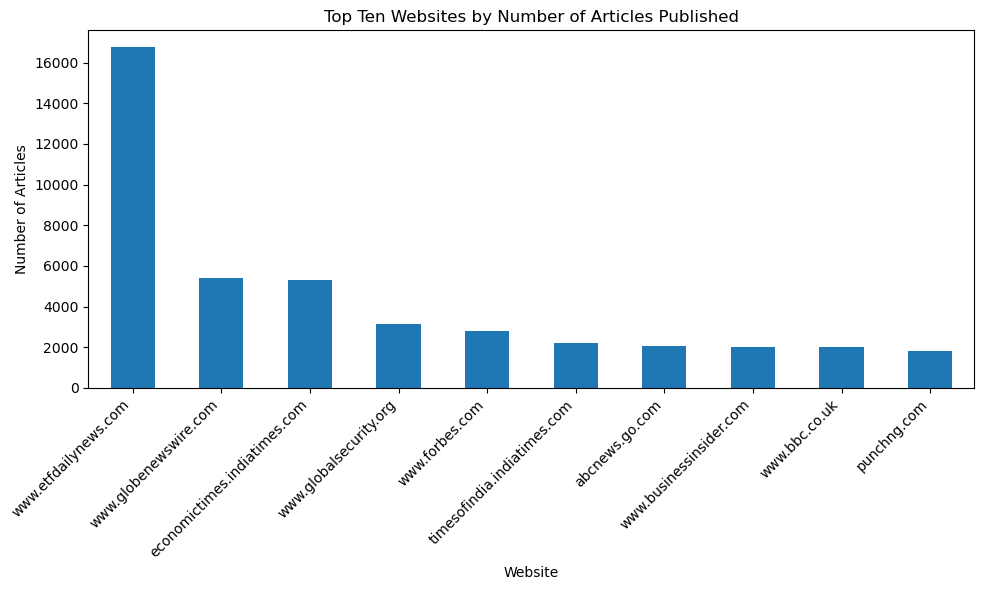

In [6]:

# Plotting the top ten websites
plt.figure(figsize=(10, 6))
top_websites.plot(kind='bar')
plt.title('Top Ten Websites by Number of Articles Published')
plt.xlabel('Website')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

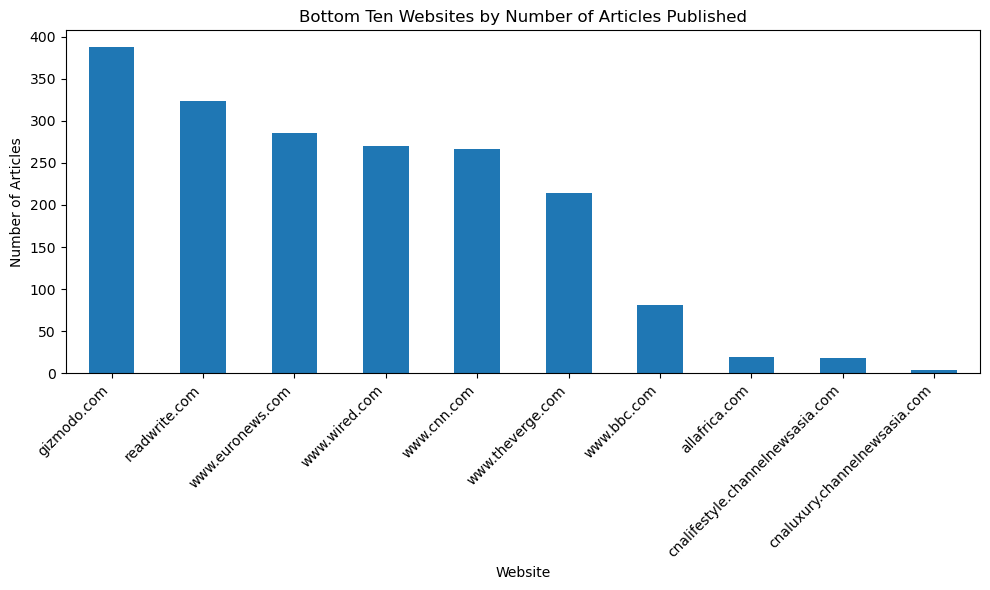

In [7]:

# Plotting the top ten websites
plt.figure(figsize=(10, 6))
bottom_websites.plot(kind='bar')
plt.title('Bottom Ten Websites by Number of Articles Published')
plt.xlabel('Website')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Task 1: Websites with the highest numbers of visitors traffic

In [12]:
sorted_data = data_traffic.sort_values(by='GlobalRank')

top_ten = sorted_data[['GlobalRank', 'Domain']].head(10)
bottom_ten = sorted_data[['GlobalRank', 'Domain']].tail(10)

print("Top Ten Domain Names by GlobalRank:")
print(top_ten)

print("\nBottom Ten Domain Names by GlobalRank:")
print(bottom_ten)

Top Ten Domain Names by GlobalRank:
   GlobalRank                Domain
0           1            google.com
1           2          facebook.com
2           3           youtube.com
3           4           twitter.com
4           5         instagram.com
5           6          linkedin.com
6           7             apple.com
7           8         microsoft.com
8           9  googletagmanager.com
9          10         wikipedia.org

Bottom Ten Domain Names by GlobalRank:
        GlobalRank                  Domain
999990      999991            eiretrip.com
999991      999992    exploring-africa.com
999992      999993                hmag.com
999993      999994          irishcycle.com
999994      999995         keith-baker.com
999995      999996              kireie.com
999996      999997             mt-lock.com
999997      999998           pinkwater.com
999998      999999          soderhomes.com
999999     1000000  toyotamusicfactory.com


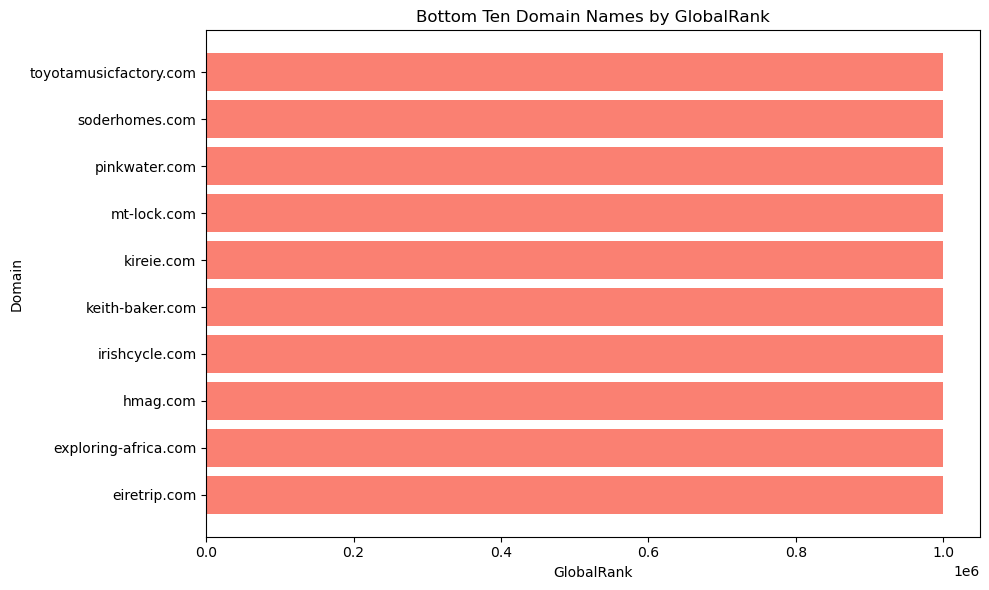

In [14]:
plt.figure(figsize=(10, 6))
plt.barh(bottom_ten['Domain'], bottom_ten['GlobalRank'], color='salmon')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rank at the top
plt.title('Bottom Ten Domain Names by GlobalRank')
plt.xlabel('GlobalRank')
plt.ylabel('Domain')
plt.tight_layout()
plt.show()

# Task 1: Countries with the highest number of news media organisations

In [8]:
country_counts = data_domain.groupby('Country')['SourceCommonName'].nunique()
sorted_country_counts = country_counts.sort_values(ascending=False)
top_countries = sorted_country_counts.head(10)
bottom_countries = sorted_country_counts.tail(10)
print("Top Ten Countries with the highest number of news media organizations:")
print(top_countries)
print("\nBottom Ten Countries with the lowest number of news media organizations:")
print(bottom_countries)

Top Ten Countries with the highest number of news media organizations:
Country
United States     14111
United Kingdom     1946
Italy              1804
France             1039
Russia             1020
Canada              886
Germany             884
China               779
Turkey              725
India               686
Name: SourceCommonName, dtype: int64

Bottom Ten Countries with the lowest number of news media organizations:
Country
Guinea-Bissau               1
Guernsey                    1
Mayotte                     1
Oceans                      1
Greenland                   1
Aruba                       1
Saint Helena                1
Guadeloupe                  1
Cook Islands                1
Turks and Caicos Islands    1
Name: SourceCommonName, dtype: int64


# Task 1: Countries that have many articles written about them

In [87]:
country_names = data_domain['Country'].tolist()
country_data = data[data['category'].isin(country_names)]
country_talking_counts = country_data['category'].value_counts()
sorted_country_talking = country_talking_counts.sort_values(ascending=False)
top_10_countries = sorted_country_talking.head(10)
bottom_10_countries = sorted_country_talking.tail(10)

print("Top Ten Countries with the highest news counts:")
print(top_10_countries)

print("\nBottom Ten Countries with the lowest news counts:")
print(bottom_10_countries)


Top Ten Countries with the highest news counts:
category
Canada            2066
India             1054
Australia          877
United Kingdom     753
Ukraine            577
Mexico             553
United States      481
Nigeria            469
Germany            459
Hong Kong          430
Name: count, dtype: int64

Bottom Ten Countries with the lowest news counts:
category
Liechtenstein    8
Bhutan           7
Montserrat       7
Eritrea          6
Gambia           4
San Marino       4
Honduras         3
Andorra          3
Burundi          3
Martinique       2
Name: count, dtype: int64


# Task 1: Websites that reported (the news content) about Africa, US, China, EU, Russia, Ukraine, Middle East?

In [10]:
african_countries = ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo",
"Democratic Republic of the Congo", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Ethiopia", "Eswatini", "Gabon", "Gambia", "Ghana", "Guinea", 
"Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", 
"Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "São Tomé and Príncipe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", 
"South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"]

europian_countries= ["Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", 
"Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", "Hungary", "Iceland",
"Ireland", "Italy", "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro",
"Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain",
"Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom"]

middle_east =["Bahrain", "Cyprus", "Egypt", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Qatar", "Saudi Arabia", "Syria",
"Turkey", "United Arab Emirates", "Yemen"]

united_states = ['United States']
china = ['China']
russia = ['Russia']
ukraine = ['Ukraine']
def news_count_per_group(group_name, data):
    group_data = data[data['category'].isin(group_name)]
    group_website_counts = group_data['website'].value_counts()
    sorted_group_website_count = group_website_counts.sort_values(ascending=False)
    top_10_group_websites = sorted_group_website_count.head(10)
    bottom_10_group_websites = sorted_group_website_count.tail(10)

    print('\nTop ten websites')
    print(top_10_group_websites)

    print('\nBottom ten websites')
    print(bottom_10_group_websites)

# Call the function with the list of African countries and your data
print('websites who are talking about African countries')
news_count_per_group(african_countries, data)

print('\nwebsites who are talking about Europian countries')
news_count_per_group(europian_countries, data)

print('\nwebsites who are talking about Middle East')
news_count_per_group(middle_east, data)

print('\nwebsites who are talking about United State')
news_count_per_group(united_states, data)

print('\nwebsites who are talking about China')
news_count_per_group(china, data)

print('\nwebsites who are talking about Russia')
news_count_per_group(russia, data)

print('\nwebsites who are talking about Ukraine')
news_count_per_group(ukraine, data)

websites who are talking about African countries

Top ten websites
website
punchng.com                     839
www.marketscreener.com          248
www.globalsecurity.org          202
www.etfdailynews.com            190
www.bbc.co.uk                   136
www.rt.com                      130
economictimes.indiatimes.com    122
www.aljazeera.com               117
abcnews.go.com                  116
www.ibtimes.com                  98
Name: count, dtype: int64

Bottom ten websites
website
time.com                  21
indianexpress.com         15
boingboing.net             8
gizmodo.com                5
www.digitaltrends.com      3
www.androidcentral.com     2
www.wired.com              2
readwrite.com              2
www.bbc.com                2
www.theverge.com           1
Name: count, dtype: int64

websites who are talking about Europian countries

Top ten websites
website
www.etfdailynews.com       1072
www.globalsecurity.org      573
www.globenewswire.com       571
www.rt.com           

# Task 1: Websites with the highest count of positive, neutral, and negative sentiment?

In [12]:
grouped_data = data.groupby(['website', 'title_sentiment'])
sentiment_counts = grouped_data.size().unstack(fill_value=0)
sentiment_counts['mean'] = sentiment_counts.mean(axis=1)
sorted_sentiment_counts = sentiment_counts.sort_values(by='mean', ascending=False)
top_ten = sorted_sentiment_counts.head(10)
bottom_ten = sorted_sentiment_counts.tail(10)
print("Top Ten Websites:")
print(top_ten)
print("\nBottom Ten Websites:")
print(bottom_ten)

Top Ten Websites:
title_sentiment               Negative  Neutral  Positive         mean
website                                                               
www.etfdailynews.com               560    15194       992  5582.000000
www.globenewswire.com               27     4491       905  1807.666667
economictimes.indiatimes.com       744     3634       932  1770.000000
www.globalsecurity.org             747     2255       117  1039.666667
www.forbes.com                     216     1933       635   928.000000
timesofindia.indiatimes.com        466     1515       213   731.333333
abcnews.go.com                     726     1193       139   686.000000
www.businessinsider.com            890      907       237   678.000000
www.bbc.co.uk                      828     1135        69   677.333333
punchng.com                        455     1229       116   600.000000

Bottom Ten Websites:
title_sentiment                   Negative  Neutral  Positive        mean
website                           

In [13]:
website_sentiment_counts = data.groupby(['website', 'title_sentiment']).size().unstack(fill_value=0)

# Print the sentiment counts for each website
print(website_sentiment_counts)

title_sentiment                   Negative  Neutral  Positive
website                                                      
abcnews.go.com                         726     1193       139
allafrica.com                            8       12         0
boingboing.net                         250      293       170
cnalifestyle.channelnewsasia.com         0       12         6
cnaluxury.channelnewsasia.com            0        2         2
deadline.com                            84      794        54
economictimes.indiatimes.com           744     3634       932
gizmodo.com                             76      253        59
indianexpress.com                      251      787       138
phys.org                               284      836       143
punchng.com                            455     1229       116
readwrite.com                           38      216        70
time.com                               185      382        33
timesofindia.indiatimes.com            466     1515       213
www.alja

In [10]:
# Filter rows where 'title_sentiment' is negative
negative_sentiment_data = data[data['title_sentiment'] == 'negative']

# Group by 'website' and count occurrences of negative sentiment
negative_sentiment_counts = negative_sentiment_data.groupby('website').size()

# Calculate the total number of titles for each website
total_titles_per_website = data.groupby('website').size()

# Calculate the mean negative sentiment for each website
mean_negative_sentiment = negative_sentiment_counts / total_titles_per_website

# Sort mean negative sentiment values in ascending order
mean_negative_sentiment_sorted = mean_negative_sentiment.sort_values()

# Get top 10 and bottom 10 websites
top_10_websites = mean_negative_sentiment_sorted.tail(10)
bottom_10_websites = mean_negative_sentiment_sorted.head(10)

# Print mean negative sentiment for top 10 websites
print("Mean Negative Sentiment for Top 10 Websites:")
for website in top_10_websites.index:
    print(f"{website}: {top_10_websites[website]}")

print("\n")

# Print mean negative sentiment for bottom 10 websites
print("Mean Negative Sentiment for Bottom 10 Websites:")
for website in bottom_10_websites.index:
    print(f"{website}: {bottom_10_websites[website]}")

Mean Negative Sentiment for Top 10 Websites:
www.euronews.com: nan
www.forbes.com: nan
www.globalsecurity.org: nan
www.globenewswire.com: nan
www.ibtimes.com: nan
www.marketscreener.com: nan
www.npr.org: nan
www.rt.com: nan
www.theverge.com: nan
www.wired.com: nan


Mean Negative Sentiment for Bottom 10 Websites:
abcnews.go.com: nan
allafrica.com: nan
boingboing.net: nan
cnalifestyle.channelnewsasia.com: nan
cnaluxury.channelnewsasia.com: nan
deadline.com: nan
economictimes.indiatimes.com: nan
gizmodo.com: nan
indianexpress.com: nan
phys.org: nan


In [37]:
# Filter rows where 'title_sentiment' is negative
negative_sentiment_data = data[data['title_sentiment'] == 'Negative']

# Group by 'website' and count occurrences of negative sentiment
negative_sentiment_counts = negative_sentiment_data.groupby('website').size()

# Calculate the total number of titles for each website
total_titles_per_website = data.groupby('website').size()

# Calculate the mean negative sentiment for each website
mean_negative_sentiment = negative_sentiment_counts / total_titles_per_website

# Sort mean negative sentiment values in ascending order
mean_negative_sentiment_sorted = mean_negative_sentiment.sort_values()

# Print the top 10 and bottom 10 mean negative sentiment values
print("Top 10 Mean Negative Sentiment:")
print(mean_negative_sentiment_sorted.tail(10))
print("\nBottom 10 Mean Negative Sentiment:")
print(mean_negative_sentiment_sorted.head(10))

Top 10 Mean Negative Sentiment:
website
abcnews.go.com                      0.352770
www.rt.com                          0.357270
www.cnn.com                         0.382022
www.euronews.com                    0.398601
allafrica.com                       0.400000
www.bbc.co.uk                       0.407480
www.aljazeera.com                   0.424279
www.businessinsider.com             0.437561
cnalifestyle.channelnewsasia.com         NaN
cnaluxury.channelnewsasia.com            NaN
dtype: float64

Bottom 10 Mean Negative Sentiment:
website
www.globenewswire.com           0.004979
www.marketscreener.com          0.030837
www.etfdailynews.com            0.033441
www.digitaltrends.com           0.054847
www.androidcentral.com          0.072797
www.forbes.com                  0.077586
deadline.com                    0.090129
readwrite.com                   0.117284
economictimes.indiatimes.com    0.140113
www.theverge.com                0.163551
dtype: float64


In [41]:
# Filter rows where 'title_sentiment' is negative
negative_sentiment_data = data[data['title_sentiment'] == 'Negative']

# Group by 'website' and count occurrences of negative sentiment
negative_sentiment_counts = negative_sentiment_data.groupby('website').size()

# Calculate the total number of titles for each website
total_titles_per_website = data.groupby('website').size()

# Calculate the mean negative sentiment for each website
mean_negative_sentiment = negative_sentiment_counts / total_titles_per_website

# Sort mean negative sentiment in ascending order to find lowest
lowest_mean_negative_sentiment = mean_negative_sentiment.sort_values().head(10)

# Sort mean negative sentiment in descending order to find highest
highest_mean_negative_sentiment = mean_negative_sentiment.sort_values(ascending=False).head(10)

print("Top 10 websites with the lowest mean negative sentiment:")
print(lowest_mean_negative_sentiment)

print("\nTop 10 websites with the highest mean negative sentiment:")
print(highest_mean_negative_sentiment)

Top 10 websites with the lowest mean negative sentiment:
website
www.globenewswire.com           0.004979
www.marketscreener.com          0.030837
www.etfdailynews.com            0.033441
www.digitaltrends.com           0.054847
www.androidcentral.com          0.072797
www.forbes.com                  0.077586
deadline.com                    0.090129
readwrite.com                   0.117284
economictimes.indiatimes.com    0.140113
www.theverge.com                0.163551
dtype: float64

Top 10 websites with the highest mean negative sentiment:
website
www.businessinsider.com    0.437561
www.aljazeera.com          0.424279
www.bbc.co.uk              0.407480
allafrica.com              0.400000
www.euronews.com           0.398601
www.cnn.com                0.382022
www.rt.com                 0.357270
abcnews.go.com             0.352770
boingboing.net             0.350631
www.bbc.com                0.320988
dtype: float64


In [42]:
negative_sentiment_data = data[data['title_sentiment'] == 'Negative']
negative_sentiment_counts = negative_sentiment_data.groupby('website').size()
total_titles_per_website = data.groupby('website').size()
mean_negative_sentiment = negative_sentiment_counts / total_titles_per_website
mean_negative_sentiment_sorted = mean_negative_sentiment.sort_values(ascending=False)
top_10_high_negative_sentiment = mean_negative_sentiment_sorted.head(10)
bottom_10_low_negative_sentiment = mean_negative_sentiment_sorted.tail(10)

print("Top 10 Websites with Highest Mean Negative Sentiment:")
print(top_10_high_negative_sentiment)
print("\nBottom 10 Websites with Lowest Mean Negative Sentiment:")
print(bottom_10_low_negative_sentiment)

Top 10 Websites with Highest Mean Negative Sentiment:
website
www.businessinsider.com    0.437561
www.aljazeera.com          0.424279
www.bbc.co.uk              0.407480
allafrica.com              0.400000
www.euronews.com           0.398601
www.cnn.com                0.382022
www.rt.com                 0.357270
abcnews.go.com             0.352770
boingboing.net             0.350631
www.bbc.com                0.320988
dtype: float64

Bottom 10 Websites with Lowest Mean Negative Sentiment:
website
readwrite.com                       0.117284
deadline.com                        0.090129
www.forbes.com                      0.077586
www.androidcentral.com              0.072797
www.digitaltrends.com               0.054847
www.etfdailynews.com                0.033441
www.marketscreener.com              0.030837
www.globenewswire.com               0.004979
cnalifestyle.channelnewsasia.com         NaN
cnaluxury.channelnewsasia.com            NaN
dtype: float64


In [47]:
positive_sentiment_data = data[data['title_sentiment'] == 'Positive']
positive_sentiment_counts = positive_sentiment_data.groupby('website').size()
total_titles_per_website = data.groupby('website').size()
mean_positive_sentiment = positive_sentiment_counts / total_titles_per_website
mean_positive_sentiment_sorted = mean_positive_sentiment.sort_values(ascending=False)
top_10_high_positive_sentiment = mean_positive_sentiment_sorted.head(10)
bottom_10_low_positive_sentiment = mean_positive_sentiment_sorted.tail(10)

print("Top 10 Websites with Highest Mean Positive Sentiment:")
print(top_10_high_positive_sentiment)
print("\nBottom 10 Websites with Lowest Mean Positive Sentiment:")
print(bottom_10_low_positive_sentiment)

Top 10 Websites with Highest Mean Positive Sentiment:
website
www.androidcentral.com              0.521073
www.digitaltrends.com               0.517857
cnaluxury.channelnewsasia.com       0.500000
cnalifestyle.channelnewsasia.com    0.333333
www.theverge.com                    0.285047
www.wired.com                       0.248148
boingboing.net                      0.238429
www.forbes.com                      0.228089
readwrite.com                       0.216049
economictimes.indiatimes.com        0.175518
dtype: float64

Bottom 10 Websites with Lowest Mean Positive Sentiment:
website
www.etfdailynews.com      0.059238
deadline.com              0.057940
time.com                  0.055000
www.euronews.com          0.052448
www.globalsecurity.org    0.037512
www.ibtimes.com           0.036454
www.bbc.co.uk             0.033957
www.rt.com                0.023936
www.aljazeera.com         0.018630
allafrica.com                  NaN
dtype: float64


In [48]:
neutral_sentiment_data = data[data['title_sentiment'] == 'Neutral']
neutral_sentiment_counts = neutral_sentiment_data.groupby('website').size()
total_titles_per_website = data.groupby('website').size()
mean_neutral_sentiment = neutral_sentiment_counts / total_titles_per_website
mean_neutral_sentiment_sorted = mean_neutral_sentiment.sort_values(ascending=False)
top_10_high_neutral_sentiment = mean_neutral_sentiment_sorted.head(10)
bottom_10_low_neutral_sentiment = mean_neutral_sentiment_sorted.tail(10)

print("Top 10 Websites with Highest Mean Neutral Sentiment:")
print(top_10_high_neutral_sentiment)
print("\nBottom 10 Websites with Lowest Mean Neutral Sentiment:")
print(bottom_10_low_neutral_sentiment)

Top 10 Websites with Highest Mean Neutral Sentiment:
website
www.etfdailynews.com            0.907321
www.marketscreener.com          0.856828
deadline.com                    0.851931
www.globenewswire.com           0.828139
www.globalsecurity.org          0.722988
www.ibtimes.com                 0.699254
www.forbes.com                  0.694325
timesofindia.indiatimes.com     0.690520
www.channelnewsasia.com         0.687117
economictimes.indiatimes.com    0.684369
dtype: float64

Bottom 10 Websites with Lowest Mean Neutral Sentiment:
website
www.aljazeera.com                0.557091
www.theverge.com                 0.551402
www.euronews.com                 0.548951
www.cnn.com                      0.531835
www.wired.com                    0.511111
cnaluxury.channelnewsasia.com    0.500000
www.businessinsider.com          0.445919
www.digitaltrends.com            0.427296
boingboing.net                   0.410940
www.androidcentral.com           0.406130
dtype: float64
